In [81]:
from IPython.display import Image

# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras
import PIL
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

# Printing version of the TensorFlow

print(tf.__version__)



2.17.0


In [82]:
# Load Dataset
import pathlib
data_dir = pathlib.Path("images/Cyrillic")
image_count = len(list(data_dir.glob("*/*.png")))
print(image_count)
batch_size = 32
img_height = 32
img_width = 32

training_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="training",
    validation_split=0.2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    subset="validation",
    validation_split=0.2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

15480
Found 15480 files belonging to 34 classes.
Using 12384 files for training.
Found 15480 files belonging to 34 classes.
Using 3096 files for validation.


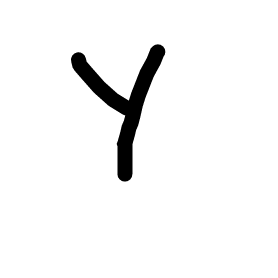

In [83]:


class_names = training_dataset.class_names
images_test = list(data_dir.glob("*/*.png"))
PIL.Image.open(str(images_test[13]))

In [84]:
for image_batch, labels_batch in training_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 32, 32, 3)
(32,)


The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general we should seek to make our input values small.

In [85]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

Configuring the dataset for performance
Let's make sure to use buffered prefetching so we can yield data from disk without having I/O become blocking.

In [86]:
AUTOTUNE = tf.data.AUTOTUNE

# def configure_for_performance(ds):
#   ds = ds.cache()
#   ds = ds.shuffle(buffer_size=1000)
#   ds = ds.batch(batch_size)
#   ds = ds.prefetch(buffer_size=AUTOTUNE)
#   return ds
# training_dataset = configure_for_performance(training_dataset)
# validation_dataset = configure_for_performance(validation_dataset)


Training our Model


In [87]:
num_classes = 34

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [88]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [89]:
model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=15
)


Epoch 1/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0285 - loss: 3.5255 - val_accuracy: 0.0375 - val_loss: 3.5231
Epoch 2/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0342 - loss: 3.5224 - val_accuracy: 0.0423 - val_loss: 3.5216
Epoch 3/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0330 - loss: 3.5210 - val_accuracy: 0.0423 - val_loss: 3.5210
Epoch 4/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0339 - loss: 3.5200 - val_accuracy: 0.0423 - val_loss: 3.5208
Epoch 5/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0336 - loss: 3.5197 - val_accuracy: 0.0423 - val_loss: 3.5207
Epoch 6/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0344 - loss: 3.5195 - val_accuracy: 0.0423 - val_loss: 3.5207
Epoch 7/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0346 - loss: 3.5197 - val_accuracy: 0.0423 - val_loss: 3.5207
Epoch 8/15
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0341 - loss: 3.5197 - val_accuracy: 0